In [146]:
%load_ext autoreload
%autoreload 2

import os
import dlib
import imutils
import cv2
import argparse

import math
import matplotlib.pyplot as plt
import numpy as np


from find_eyes import find_eyes_from_image
from find_mouth_curve import find_mouth_curve_from_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


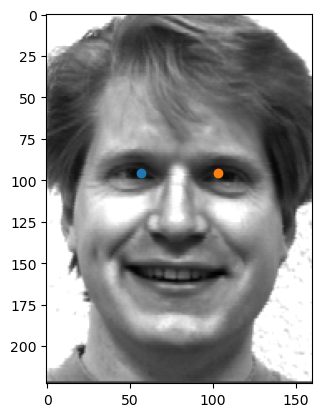

In [129]:
directory = 'images/'
im_file = directory + 'subject01_happy.png'

im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# im = cv2.imread(im_file, cv2.IMREAD_GRAYSCALE)

# plt.imshow(im, cmap='gray')

# im_crop = im[100:200, 130:230]
im_crop = im[20:, 100:260] 

eye_list = find_eyes_from_image(im_crop)

plt.scatter(x = eye_list[0][0], y = eye_list[0][1])
plt.scatter(x = eye_list[1][0], y = eye_list[1][1])

# print(eye_list)

plt.imshow(im_crop, cmap='gray')

In [130]:
# ysize = 20
# xsize = 15

# #haar = np.concatenate((np.concatenate((np.zeros([xsize, ysize]), np.ones([xsize, ysize])), axis=0), (np.zeros([xsize, ysize]))), axis=0) - 0.5
# haar = np.concatenate( (np.zeros([ysize, xsize]), np.ones([ysize, xsize])),axis=0) - 0.5
# plt.imshow(haar)
# plt.show()


# #ysize2 = 20
# xsize2 = 25

# haar_inv = haar * -1
# plt.imshow(haar_inv)
# plt.show()

In [131]:
# haar_fil1 = cv2.filter2D(src=im_crop, ddepth=-1, kernel=haar_inv)
# haar_thresh = (haar_fil1 < np.min(haar_fil1) * 0.5) * 1.0
# plt.imshow(haar_thresh)
# plt.show()

In [132]:
# this is a pretty naive approach.
# finding a way to explicitly trace the curve of the lips would be helpful. 
# unfortunately cannot find anything on how to do that yet.
# also will need to adjust this to process surprised faces for the future.

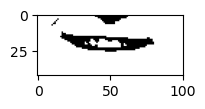

In [133]:
im = cv2.imread(im_file, cv2.IMREAD_GRAYSCALE)

# plt.imshow(im, cmap='gray')

im_crop = im[20:, 100:260] 
# im_crop = im[100:200, 130:230]
# im_crop = im[20:, 100:260] 

ret, thresh = cv2.threshold(im_crop, 60, 255, cv2.THRESH_BINARY)
# visualize the binary image
y_min = int(eye_list[0][1] + 0.19 * im_crop.shape[0])
y_max = int(y_min + 0.19 * im_crop.shape[0])

# print(y_min)
# print(y_max)

x_min = int(eye_list[0][0] - 0.17 * im_crop.shape[1])
x_max = int(eye_list[1][0] + 0.17 * im_crop.shape[1])

# print(x_min)
# print(x_max)

thresh = thresh[y_min:y_max, x_min:x_max]

plt.subplot(2, 3, 1),plt.imshow(thresh, 'gray', vmin=0, vmax=255)
plt.show()

[-3.56338774e-03  3.67878339e-01  1.03322149e+01]


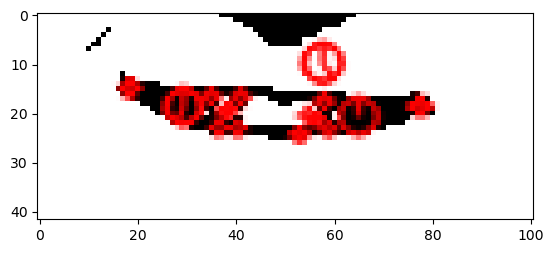

In [137]:
features = cv2.SIFT_create() 
  
keypoints = features.detect(thresh, None)
# print(keypoints[0].pt, keypoints[0].pt[0], len(keypoints))

kp_len = len(keypoints)

xcoords = np.zeros(kp_len)
ycoords = np.zeros(kp_len)
# xycoords = []

for i in range(kp_len):
    xcoords[i] = keypoints[i].pt[0]
    ycoords[i] = keypoints[i].pt[1]
    # coords = np.zeros(2)
    # coords[0] = keypoints[i].pt[0]
    # coords[1] = keypoints[i].pt[1]
    # xycoords.append(coords)

# xycoords = np.asarray(xycoords)

coeffs = np.polyfit(xcoords, ycoords, 2)
print(coeffs)

# the first coefficient determines if the curve is up or down
# the axes are flipped so multiply by -1
result = coeffs[0] * -1
  
output_image = cv2.drawKeypoints(thresh, keypoints, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

plt.imshow(output_image) 
plt.show() 

In [139]:
# output_image = cv2.polylines(thresh, np.int32([xycoords]), False, (0,0,0))

# plt.imshow(output_image) 
# plt.show() 

In [140]:
if (result > 0): 
    print("Subject is happy!")
elif (result < -0.001):
    print("Subject is sad.")
else:
    print("Subject is neutral.")

Subject is happy!


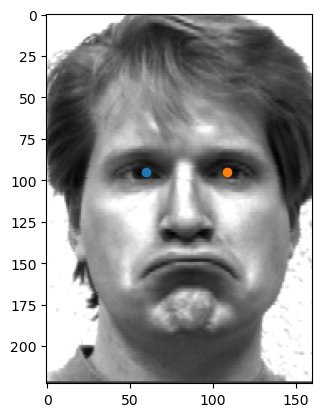

In [141]:
# test 2
im_file = directory + 'subject01_sad.png'

im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# im = cv2.imread(im_file, cv2.IMREAD_GRAYSCALE)

# plt.imshow(im, cmap='gray')

# im_crop = im[100:200, 130:230]
im_crop = im[20:, 100:260] 

eye_list = find_eyes_from_image(im_crop)

plt.scatter(x = eye_list[0][0], y = eye_list[0][1])
plt.scatter(x = eye_list[1][0], y = eye_list[1][1])

# print(eye_list)

plt.imshow(im_crop, cmap='gray')

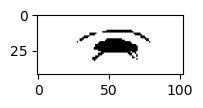

In [142]:
im = cv2.imread(im_file, cv2.IMREAD_GRAYSCALE)

# plt.imshow(im, cmap='gray')

im_crop = im[20:, 100:260] 
# im_crop = im[100:200, 130:230]
# im_crop = im[20:, 100:260] 

ret, thresh = cv2.threshold(im_crop, 60, 255, cv2.THRESH_BINARY)
# visualize the binary image
y_min = int(eye_list[0][1] + 0.19 * im_crop.shape[0])
y_max = int(y_min + 0.19 * im_crop.shape[0])

# print(y_min)
# print(y_max)

x_min = int(eye_list[0][0] - 0.17 * im_crop.shape[1])
x_max = int(eye_list[1][0] + 0.17 * im_crop.shape[1])

# print(x_min)
# print(x_max)

thresh = thresh[y_min:y_max, x_min:x_max]

plt.subplot(2, 3, 1),plt.imshow(thresh, 'gray', vmin=0, vmax=255)
plt.show()

[ 7.67167759e-02 -8.44735913e+00  2.46302078e+02]


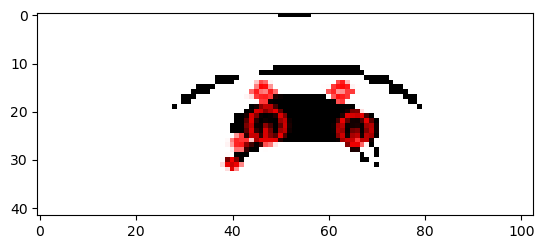

In [143]:
features = cv2.SIFT_create() 
  
keypoints = features.detect(thresh, None)
# print(keypoints[0].pt, keypoints[0].pt[0], len(keypoints))

kp_len = len(keypoints)

xcoords = np.zeros(kp_len)
ycoords = np.zeros(kp_len)
# xycoords = []

for i in range(kp_len):
    xcoords[i] = keypoints[i].pt[0]
    ycoords[i] = keypoints[i].pt[1]
    # coords = np.zeros(2)
    # coords[0] = keypoints[i].pt[0]
    # coords[1] = keypoints[i].pt[1]
    # xycoords.append(coords)

# xycoords = np.asarray(xycoords)

coeffs = np.polyfit(xcoords, ycoords, 2)
print(coeffs)

# the first coefficient determines if the curve is up or down
# the axes are flipped so multiply by -1
result = coeffs[0] * -1
  
output_image = cv2.drawKeypoints(thresh, keypoints, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

plt.imshow(output_image) 
plt.show() 

In [144]:
if (result > 0): 
    print("Subject is happy!")
elif (result < -0.001):
    print("Subject is sad.")
else:
    print("Subject is neutral.")

Subject is sad.


In [150]:
# put code into a python file, function takes a filepath
print(find_mouth_curve_from_image(im_file))

sadness
